In [54]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [55]:
data

['t_n55          5.8135 ( 5.5329,  6.5851) ( 5.5205,  6.3820)  0.8615 (Jnode 106)\n',
 't_n56          5.6591 ( 5.1873,  6.4275) ( 5.1405,  6.3400)  1.1995 (Jnode 105)\n',
 't_n57          5.1670 ( 4.7235,  5.8681) ( 4.6716,  5.7886)  1.1170 (Jnode 104)\n',
 't_n58          4.2876 ( 3.8987,  4.8831) ( 3.8474,  4.8046)  0.9572 (Jnode 103)\n',
 't_n59          4.1067 ( 3.7318,  4.6731) ( 3.6963,  4.6165)  0.9202 (Jnode 102)\n',
 't_n60          3.8903 ( 3.5313,  4.4292) ( 3.4838,  4.3618)  0.8780 (Jnode 101)\n',
 't_n61          3.5686 ( 3.2323,  4.0665) ( 3.2036,  4.0129)  0.8093 (Jnode 100)\n',
 't_n62          1.6697 ( 1.4416,  1.9567) ( 1.4152,  1.9230)  0.5078 (Jnode 99)\n',
 't_n63          2.5181 ( 2.2542,  2.8890) ( 2.2239,  2.8413)  0.6174 (Jnode 98)\n',
 't_n64          1.8108 ( 1.6005,  2.0901) ( 1.5807,  2.0601)  0.4794 (Jnode 97)\n',
 't_n65          1.5764 ( 1.3873,  1.8243) ( 1.3767,  1.8057)  0.4290 (Jnode 96)\n',
 't_n66          1.2253 ( 1.0706,  1.4261) ( 1.0517,  1.40

In [56]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [57]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [58]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [59]:
posterior_mean_iqtree

[5.8135,
 5.6591,
 5.167,
 4.2876,
 4.1067,
 3.8903,
 3.5686,
 1.6697,
 2.5181,
 1.8108,
 1.5764,
 1.2253,
 0.8399,
 0.5623,
 0.2275,
 1.9011,
 3.9455,
 3.5091,
 3.5476,
 2.5528,
 2.2368,
 2.0448,
 3.8721,
 3.6364,
 3.4709,
 3.2595,
 2.9755,
 2.8543,
 2.4765,
 2.2443,
 2.0352,
 1.5478,
 1.3758,
 2.5389,
 2.0257,
 3.7616,
 0.9479,
 3.6412,
 3.37,
 2.9865,
 2.73,
 2.0079,
 2.2318,
 2.8708,
 2.7062,
 2.4122,
 1.951,
 2.4475,
 4.6106,
 3.4712,
 2.1996,
 1.7636,
 4.1224]

In [60]:
lower_ci_iqtree

[5.5329,
 5.1873,
 4.7235,
 3.8987,
 3.7318,
 3.5313,
 3.2323,
 1.4416,
 2.2542,
 1.6005,
 1.3873,
 1.0706,
 0.727,
 0.4816,
 0.1887,
 1.6818,
 3.5809,
 3.1668,
 3.2129,
 2.2769,
 1.9793,
 1.7716,
 3.5139,
 3.2975,
 3.1449,
 2.9506,
 2.6903,
 2.5773,
 2.2277,
 2.0155,
 1.8227,
 1.3779,
 1.2216,
 2.2823,
 1.8053,
 3.4114,
 0.7677,
 3.3017,
 3.0526,
 2.7012,
 2.4649,
 1.7906,
 2.0026,
 2.5944,
 2.4416,
 2.164,
 1.7321,
 2.1777,
 4.1965,
 3.1104,
 1.9001,
 1.4713,
 3.672]

In [61]:
upper_ci_iqtree

[6.5851,
 6.4275,
 5.8681,
 4.8831,
 4.6731,
 4.4292,
 4.0665,
 1.9567,
 2.889,
 2.0901,
 1.8243,
 1.4261,
 0.9863,
 0.6652,
 0.2756,
 2.2003,
 4.4869,
 4.0069,
 4.0463,
 2.932,
 2.58,
 2.3828,
 4.4128,
 4.1435,
 3.9552,
 3.7158,
 3.3967,
 3.2623,
 2.8365,
 2.5685,
 2.3333,
 1.782,
 1.5866,
 2.9067,
 2.3287,
 4.2837,
 1.1669,
 4.1502,
 3.8427,
 3.4086,
 3.119,
 2.3048,
 2.5586,
 3.276,
 3.0914,
 2.7631,
 2.2484,
 2.818,
 5.246,
 3.9777,
 2.5674,
 2.113,
 4.8128]

In [62]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

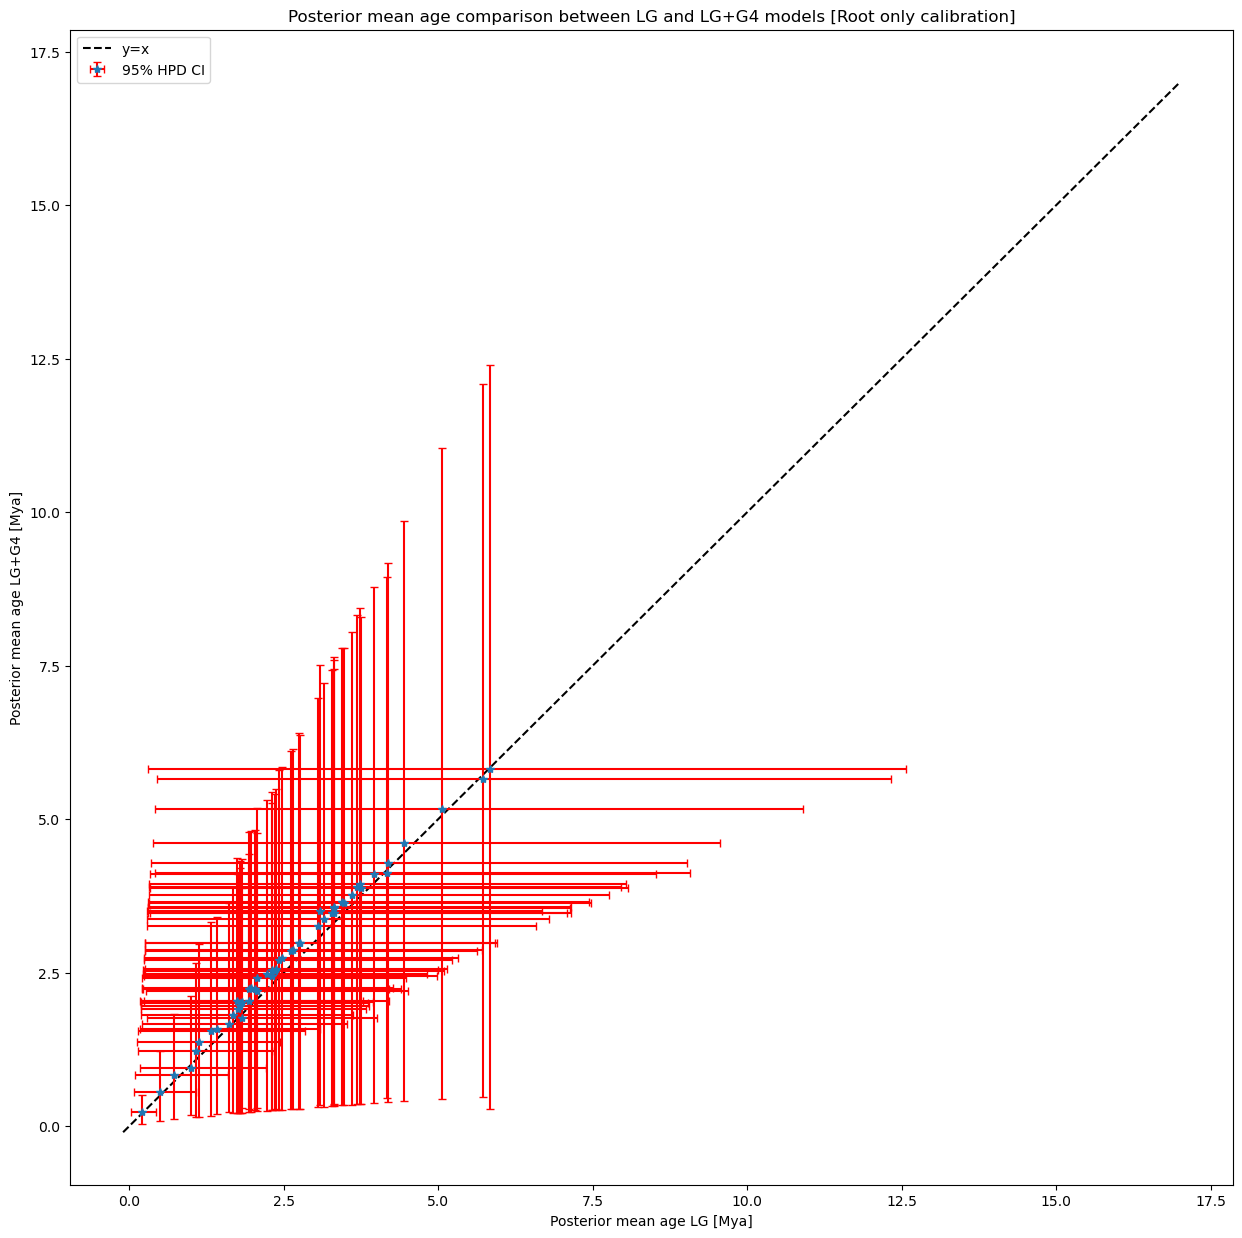

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Root only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ro.png')

In [64]:
posterior_mean_baseml

[5.844,
 5.7246,
 5.0653,
 4.1838,
 3.957,
 3.6887,
 3.3154,
 1.6179,
 2.3531,
 1.6722,
 1.4207,
 1.0802,
 0.7313,
 0.4918,
 0.1981,
 1.7656,
 3.7264,
 3.0895,
 3.3043,
 2.3781,
 2.0301,
 1.9355,
 3.7421,
 3.467,
 3.2861,
 3.0496,
 2.7576,
 2.6108,
 2.2307,
 1.977,
 1.749,
 1.3151,
 1.1253,
 2.3166,
 1.8225,
 3.6053,
 0.9995,
 3.4486,
 3.154,
 2.7417,
 2.4651,
 1.7874,
 1.9429,
 2.6505,
 2.421,
 2.068,
 1.7902,
 2.301,
 4.4379,
 3.3113,
 2.0674,
 1.8282,
 4.1752]

In [65]:
posterior_mean_iqtree

[5.8135,
 5.6591,
 5.167,
 4.2876,
 4.1067,
 3.8903,
 3.5686,
 1.6697,
 2.5181,
 1.8108,
 1.5764,
 1.2253,
 0.8399,
 0.5623,
 0.2275,
 1.9011,
 3.9455,
 3.5091,
 3.5476,
 2.5528,
 2.2368,
 2.0448,
 3.8721,
 3.6364,
 3.4709,
 3.2595,
 2.9755,
 2.8543,
 2.4765,
 2.2443,
 2.0352,
 1.5478,
 1.3758,
 2.5389,
 2.0257,
 3.7616,
 0.9479,
 3.6412,
 3.37,
 2.9865,
 2.73,
 2.0079,
 2.2318,
 2.8708,
 2.7062,
 2.4122,
 1.951,
 2.4475,
 4.6106,
 3.4712,
 2.1996,
 1.7636,
 4.1224]

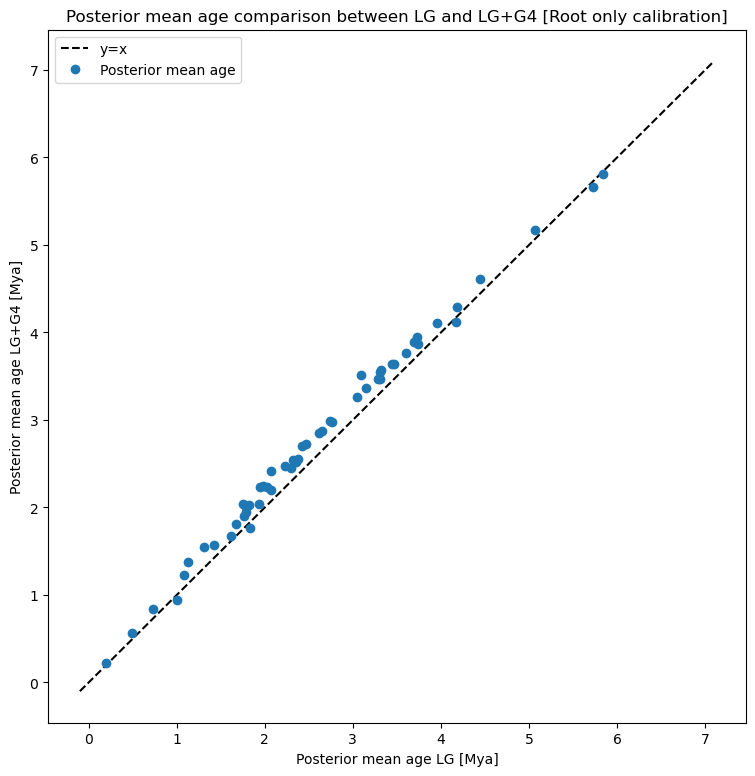

In [66]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,7.1], 
        [-0.1, 7.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ro_scatter.png')